In [0]:
!pip install cupy-cuda100 -user

# Imports

In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
# try:
#     os.mkdir('img/task13')
# except FileExistsError as err:
#     pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Autocompletion fix
# %config Completer.use_jedi=False

# Task 13. Image blur


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image and 

<strong >Example of a blurred image:</strong>
![Blur](https://github.com/zakajd/HighPerformancePython/blob/master/img/misc/blur.jpg?raw=1)

# T13.1 Before and after pictures are given (any 100x100 image)

In [0]:
!wget -P img/task13/ -q https://quintagroup.com/cms/python/images/opencv-logo.png/@@images/image.png

In [0]:
from PIL import Image
im_s = 100
fname = "img/task13/image.png"
pil_img = Image.open(fname).resize((im_s,im_s)).convert('L')
img = np.array(pil_img)
k_hs = 3
k_s = 2 * k_hs + 1
kernel = np.ones((k_s,k_s))
kernel /= kernel.sum()
cp_img = cp.array(img)
cp_kernel = cp.array(kernel)

In [0]:
def np_blur_loop(img, kernel):
    res = np.empty_like(img)
    for i in range(k_hs, im_s-k_hs):
        for j in range(k_hs, im_s-k_hs):
            res[i, j] = (img[i-k_hs:i+k_hs+1, j-k_hs:j+k_hs+1] * kernel).sum()

def np_blur(big_img, kernel):
    f_kernel = np.ravel(kernel)
    res = np.dot(big_img, f_kernel)
    return np.reshape(res, (im_s, im_s))

def cp_blur(big_img, kernel):
    f_kernel = cp.ravel(kernel)
    res = cp.dot(big_img, f_kernel)
    return cp.reshape(res, (im_s, im_s))

def cp_blur_loop(img, kernel):
    res = cp.empty_like(img)
    for i in range(k_hs, im_s-k_hs):
        for j in range(k_hs, im_s-k_hs):
              res[i, j] = (img[i-k_hs:i+k_hs+1, j-k_hs:j+k_hs+1] * kernel).sum()

    

In [0]:
big_img = np.empty((im_s*im_s, k_s*k_s), dtype='float32')
for i in range(k_hs, im_s-k_hs):
    for j in range(k_hs, im_s-k_hs):
        big_img[i*im_s + j] = img[i-k_hs:i+k_hs+1, j-k_hs:j+k_hs+1].flatten()
        
np_res = np_blur(big_img, kernel)

cp_big_img = cp.array(big_img)          
cp_res = cp_blur(cp_big_img, cp_kernel)
cp_res = cp.asnumpy(cp_res)

# T13.2	Measure CuPy implementation time

In [8]:
%timeit -n 100 cp_blur(cp_big_img, cp_kernel)
cp_blur_loop(cp_img, cp_kernel)
%timeit -n 10 cp_blur_loop(cp_img, cp_kernel)

100 loops, best of 3: 51.9 µs per loop
10 loops, best of 3: 459 ms per loop


# T13.3 Measure NumPy implementation time

In [9]:
%timeit -n 10 np_blur(big_img, kernel)
%timeit -n 10 np_blur_loop(img, kernel)

10 loops, best of 3: 1.02 ms per loop
10 loops, best of 3: 40.6 ms per loop


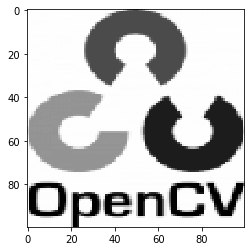

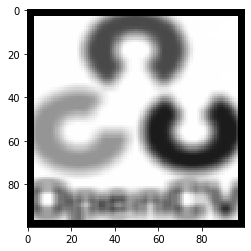

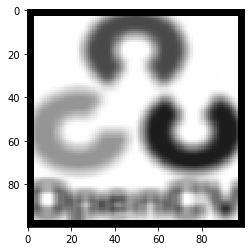

In [10]:
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(np_res.astype(np.uint8), cmap='gray')
plt.show()
plt.imshow(cp_res.astype(np.uint8), cmap='gray');